In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
#from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data = pd.read_excel('ZM-ML_Data.xlsx')
X = data.iloc[:,1:41]
Y = data.iloc[:,41]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
std = StandardScaler()
X_train_std = std.fit_transform(x_train)
X_test_std = std.transform(x_test)

D:\app\anaconda\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.0)
  from scipy.sparse import csr_matrix, issparse


In [2]:
#模型参数
kr = GridSearchCV(
    KernelRidge(kernel="rbf", alpha=0.02,gamma=0.002),
    param_grid={"alpha": [0.01, 0.1, 1], "gamma": [0.001, 0.01, 0.1]},
)

kr.fit(X_train_std,y_train)

GridSearchCV(estimator=KernelRidge(alpha=0.02, gamma=0.002, kernel='rbf'),
             param_grid={'alpha': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1]})

0  折 RandomForestRegressor:    0.012608807489420504 

1  折 RandomForestRegressor:    0.010849263713483607 

2  折 RandomForestRegressor:    0.012314992016722048 

3  折 RandomForestRegressor:    0.008107628874245333 

4  折 RandomForestRegressor:    0.007196548252878107 

     R2: 0.364946
     MAE: 0.046850
     MSE: 0.003912
     RMSE:0.062543


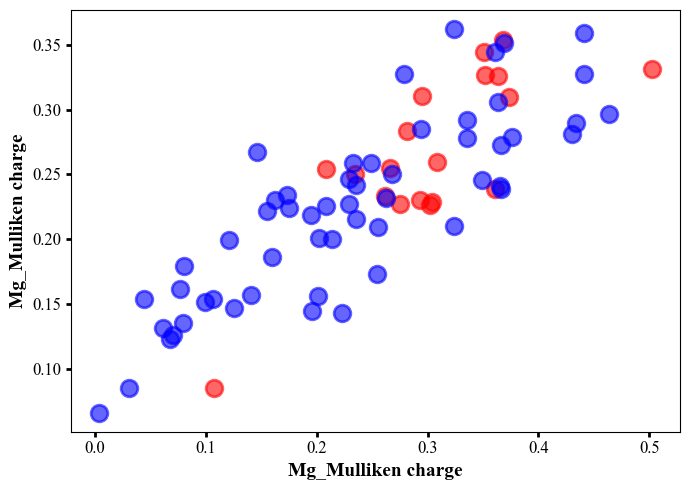

In [3]:
y_pred = kr.predict(X_test_std)
y_pred_train = kr.predict(X_train_std)

from sklearn.model_selection import KFold
KF = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(KF.split(X,Y)):
    train_data,test_data,train_target,test_target = X.iloc[train_index],X.iloc[test_index],Y.iloc[train_index],Y.iloc[test_index]
    kr.fit(train_data, train_target)
    #score_train = metrics.mean_squared_error(train_target, model.predict(train_data))
    score_test = metrics.mean_squared_error(test_target, kr.predict(test_data))
    #print(k, " 折", "RandomForestRegressor train MSE:   ", score_train)
    print(k, " 折", "RandomForestRegressor:   ", score_test, '\n') 
    
print("     R2: %f" % metrics.r2_score(y_test, y_pred))
print("     MAE: %f" % metrics.mean_absolute_error(y_test, y_pred))
print("     MSE: %f" % metrics.mean_squared_error(y_test, y_pred))
print("     RMSE:%f" % math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

%matplotlib inline

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(y_test,y_pred,'o',color='r',alpha=0.6,markersize='12',markeredgewidth=2)
ax.plot(y_train,y_pred_train,'o',color='b',alpha=0.6,markersize='12',markeredgewidth=2)

ax.set_xlabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')
ax.set_ylabel ('Mg_Mulliken charge',fontsize=14,fontweight='bold')

plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为新罗马
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号（-）

plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()